# Aufgabe 1 (5P)
Laden Sie den Datensatz mit den Wetterdaten aus Herford “herford_weather.csv“ . Importieren Sie in Ihre Python-IDE die Bibliotheken
Tensorflow 2.X und Keras. Führen Sie eine lineare Regression mit Keras durch mit dem Ziel, den Taupunkt Taupunkt ('dewpoint_2m (°C)‘)
vorherzusagen. Nutzen Sie dabei die folgenden Zwischenschritte:

In [61]:
import pandas as pd
import tensorflow as tf
import keras

# read csv file and parse it to a dataframe
df = pd.read_csv("herford_weather.csv")
df.head()

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),precipitation (mm),rain (mm),snowfall (cm),...,et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
0,1996-01-01T00:00,-2.3,80,-5.3,-7.2,1003.4,988.2,0.0,0.0,0.0,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
1,1996-01-01T01:00,-2.1,80,-5.2,-7.0,1003.8,988.6,0.0,0.0,0.0,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
2,1996-01-01T02:00,-2.0,79,-5.2,-6.9,1003.9,988.7,0.0,0.0,0.0,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
3,1996-01-01T03:00,-2.1,79,-5.3,-7.0,1004.0,988.8,0.0,0.0,0.0,...,0.01,0.11,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34
4,1996-01-01T04:00,-2.2,78,-5.5,-7.1,1004.5,989.3,0.0,0.0,0.0,...,0.01,0.12,-1.7,-0.5,2.3,7.8,0.36,0.364,0.346,0.34


## a)
Selektieren Sie und analysieren Sie die Daten 'temperature_2m (°C)', 'relativehumidity_2m (%)', 'dewpoint_2m (°C)',
'apparent_temperature (°C)', 'pressure_msl (hPa)', 'surface_pressure (hPa)', 'precipitation (mm)', 'rain (mm)', 'snowfall (cm)',
'weathercode (wmo code)', 'cloudcover (%)', 'cloudcover_low (%)', 'cloudcover_mid (%)', 'cloudcover_high (%)', 'shortwave_radiation
(W/m²)', 'direct_radiation (W/m²)', 'diffuse_radiation (W/m²)', 'direct_normal_irradiance (W/m²)', 'windspeed_10m (km/h)',
'windspeed_100m (km/h)', 'winddirection_10m (°)', 'winddirection_100m (°)', 'windgusts_10m (km/h)', 'et0_fao_evapotranspiration
(mm)', 'vapor_pressure_deficit (kPa)', 'soil_temperature_0_to_7cm (°C)', 'soil_temperature_7_to_28cm (°C)',
'soil_temperature_28_to_100cm (°C)', 'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)', 'soil_moisture_100_to_255cm (m³/m³)‘]. Wählen Sie
relevante Merkmale zur Vorhersage des Taupunkts aus. Begründen Sie Ihre Auswahl anhand der visualisierten Analyseergebnisse! (2)

<Axes: >

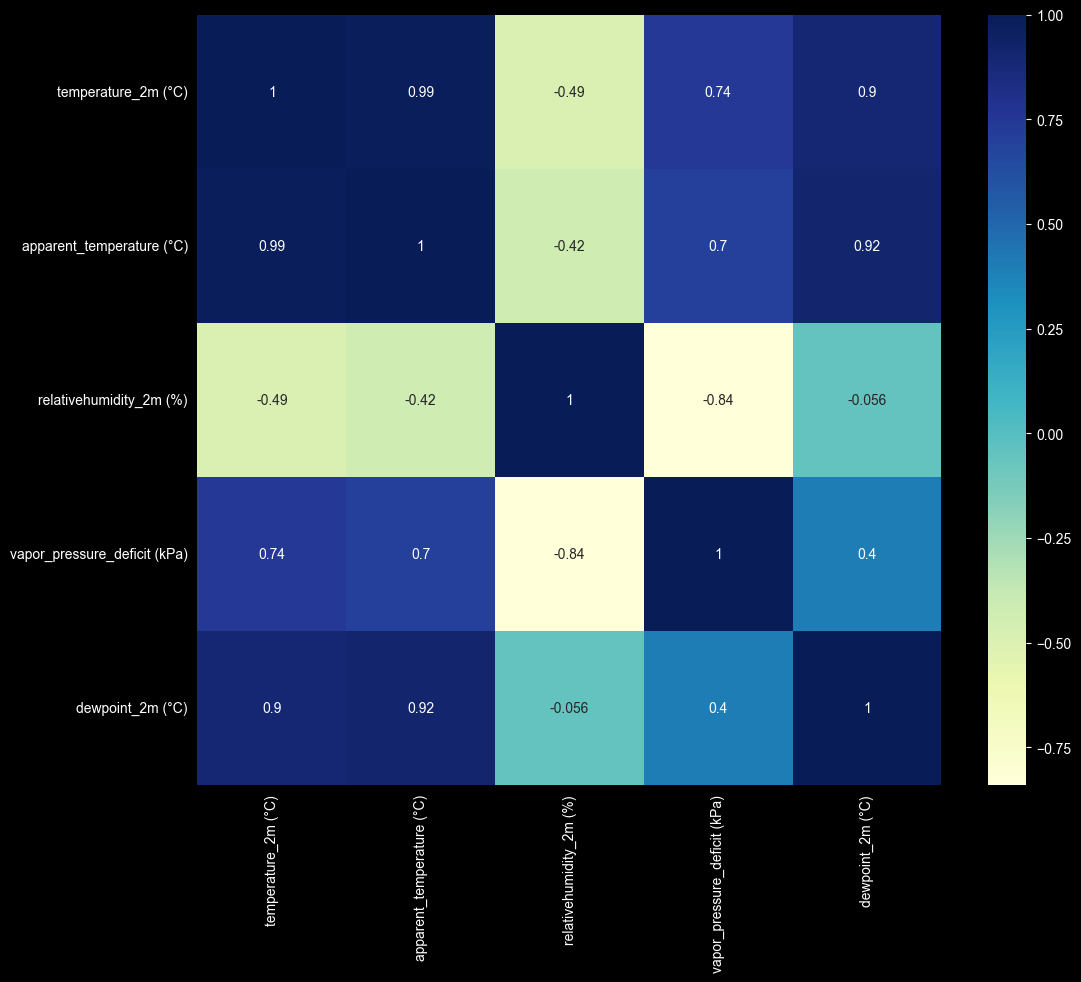

In [62]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Taupunkt, wo Temperatur 100% relative Luftfeuchtigkeit erreicht
# Relative Luftfeuchtigkeit ((Aktueller Wasserdampfgehalt / Sättigungsmenge)*100)
# Sättigungsmenge (Maximaler Wasserdampfgehalt pro Temperatur)
# Wasserdampfgehalt (Aktueller Wasserdampfgehalt)
# Wenn die 100% Wasserdampfgehaltgrenze überschritten wird, kondensiert es bzw. das Wasser wird flüssig

selected_features = [
    "temperature_2m (°C)",
    "apparent_temperature (°C)",
    "relativehumidity_2m (%)",
    "vapor_pressure_deficit (kPa)",
    "dewpoint_2m (°C)"
]

df["time"] = pd.to_datetime(df["time"])
df = df.set_index("time")

plt.figure(figsize=(12, 10))
sns.heatmap(df[selected_features].corr(), annot=True, cmap="YlGnBu")


## b)
Führen Sie eine Markmalsskalierung mit dem Standardskaler durch. Bauen Sie für die von Ihnen ausgewählten Merkmale ein
passendes Keras-Modell für die Lineare Regression auf und kompilieren und trainieren Sie es mit einem passendem Optimizer und
Verlustfunktion (0.5)

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

x = df[["temperature_2m (°C)","relativehumidity_2m (%)", "vapor_pressure_deficit (kPa)"]].values
y = df[["dewpoint_2m (°C)"]].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test  = scaler_x.transform(x_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test  = scaler_y.transform(y_test)

# empty model instance
model = Sequential()

# Adding dense layer
model.add(Dense(units=1, input_shape=(3,)))

# MSE as loss function and gradient descent as optimizer
model.compile(loss="mse", optimizer="sgd")

# model learning
history = model.fit(x_train, y_train)


   1/7487 ━━━━━━━━━━━━━━━━━━━━ 15:23 123ms/step - loss: 3.4984

C:\Users\Muhammed Korkmaz\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7487/7487 ━━━━━━━━━━━━━━━━━━━━ 5s 696us/step - loss: 0.0192


## c)
Lernen Sie das Model an, testen Sie passende Anzahlen für die „epochs“ und die „batch_size“. (0.5)

In [64]:
# epoch -> how many times the model runs through the train dataset
# batch -> package of rows/trainsets
# batch size -> iteration steps after the weights gets adjusted
history = model.fit(x, y, epochs=5, batch_size=16)

Epoch 1/5
14974/14974 ━━━━━━━━━━━━━━━━━━━━ 11s 727us/step - loss: 0.0026
Epoch 2/5
14974/14974 ━━━━━━━━━━━━━━━━━━━━ 11s 758us/step - loss: 0.0026
Epoch 3/5
14974/14974 ━━━━━━━━━━━━━━━━━━━━ 10s 669us/step - loss: 0.0026
Epoch 4/5
14974/14974 ━━━━━━━━━━━━━━━━━━━━ 11s 727us/step - loss: 0.0026
Epoch 5/5
14974/14974 ━━━━━━━━━━━━━━━━━━━━ 11s 760us/step - loss: 0.0026


## d)
Berechnen Sie für Ihr Modell R-Quadrat . (0.5)

In [65]:
from sklearn.metrics import r2_score
y_pred = model.predict(x)
r2 = r2_score(y, y_pred)
print('r2 = {:.3f}'.format(r2))

7487/7487 ━━━━━━━━━━━━━━━━━━━━ 4s 537us/step
r2 = 0.997


## e)
Untersuchen Sie die Lernkurven, zeichnen sie sie und zeigen Sie die Lernkurve für Ihr bestes erzieltes Ergebnis! (0.5)

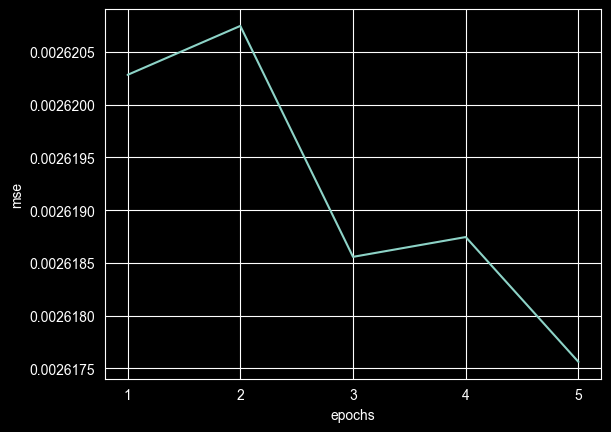

In [66]:
loss_mse = history.history['loss']
plt.xticks(range(1, len(loss_mse)+1))
plt.ylabel('mse')
plt.xlabel('epochs')
plt.plot(range(1, len(loss_mse)+1), loss_mse)

## f)
Nun sollen Sie testen, wie gut der Schneefall in Herford (snowfall (cm)) mithilfe einer linearen Regression aus dem Datensatz
geschätzt werden kann. Führen Sie dazu die Schritte a - e noch einmal durch. Erklären Sie Ihr Ergebnis. (1)